# Linear Regression: Advertisement Analysis 



**Background:**
A company invests in advertising across different channels such as TV, radio, and newspaper to promote its products. The goal is to optimize the advertising budget allocation to maximize sales.

**Objective:**

-  Utilize linear regression to develop a predictive model for the advertising dataset, enabling accurate forecasts of key performance metrics based on varying advertising budgets.
- Utilize linear regression to analyze the historical advertising dataset and provide insights and recommendations for optimizing the advertising budget.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.metrics import mean_squared_error , r2_score



In [3]:
df = pd.read_csv(r'advertising.csv')
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Data Preprocessing and Data Exploration

In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


The mean value of the Newspaper feature it to low for the maximum value that so high,  and 75% of the data lies close to the mean and far away from the maximum value. This strikes an interest.

In [5]:
#checking the missing values
missing_values = df.isnull().sum()
print(missing_values)

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


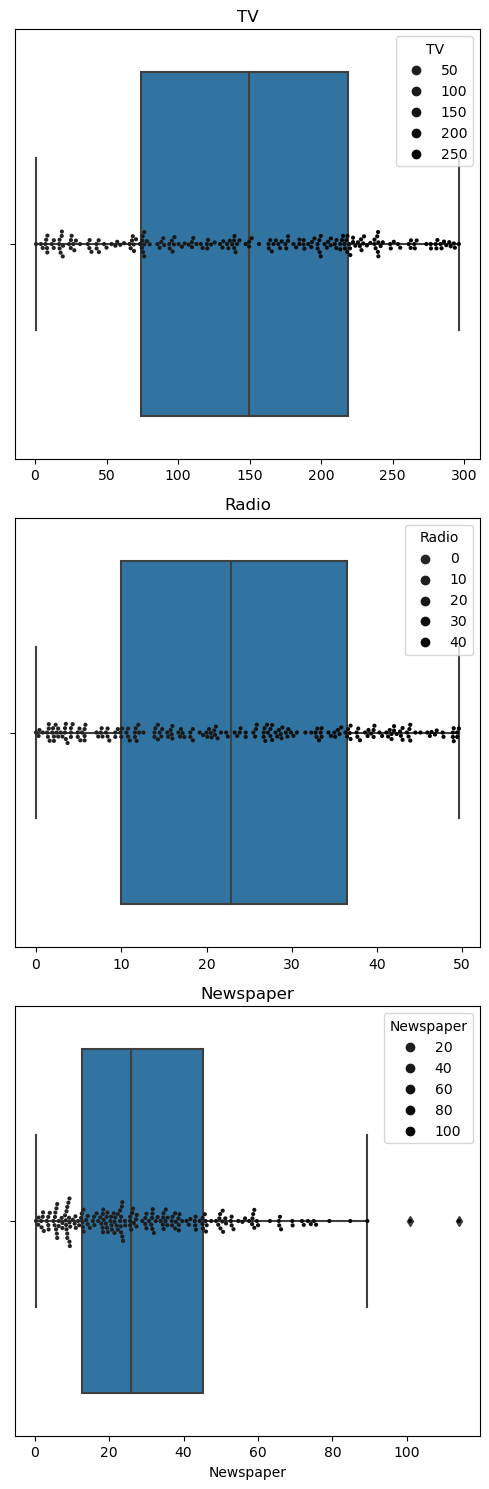

In [31]:


# Create subplots with three separate axes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 15))

# Box plot and swarm plot for 'TV'
sns.boxplot(x=df['TV'], ax=axes[0])
sns.swarmplot(x='TV', data=df, palette='dark:black', size=3, ax=axes[0], hue=df['TV'])
axes[0].set_title('TV')

# Box plot and swarm plot for 'Radio'
sns.boxplot(x=df['Radio'], ax=axes[1])
sns.swarmplot(x='Radio', data=df, palette='dark:black', size=3, ax=axes[1], hue=df['Radio'])
axes[1].set_title('Radio')

# Box plot and swarm plot for 'Newspaper'
sns.boxplot(x=df['Newspaper'], ax=axes[2])
sns.swarmplot(x='Newspaper', data=df, palette='dark:black', size=3, ax=axes[2], hue=df['Newspaper'])
axes[2].set_title('Newspaper')

plt.tight_layout()
plt.show()


found two points lies beyond the maximum in the newspaper box and whisker, thats a potential area of interest. Therefore, further inspection on the two data points is needed to understand the nature and whether they are valid data points or potential errors. \n
I'll use statistical methods to quantify the extent to which the values in the 'Newspaper' column deviate from the norm.

Data distribution analysis:
- Radio and Tv boxes are in the middle indicating a normal distrubition of data and have large boxes indicating a larger spread, large standard deviation.
- Whereas the box of the newspaer is skewed to the right and with small box showing a small spread.


In [37]:
df['Newspaper'].describe()


count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: Newspaper, dtype: float64

the maximum vakues is deviated too much from the middle value. howver that is not enough to ientified the values as outliers.

In [42]:
# Calculate the lower quartile (25th percentile)
upper_quantile = df['Newspaper'].quantile(0.75)

# Get values in the lower quantile
upper_quantile_values = df[df['Newspaper'] >= upper_quantile]

print(upper_quantile_values)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
5      8.7   48.9       75.0    7.2
12    23.8   35.1       65.9    9.2
14   204.1   32.9       46.0   19.0
15   195.4   47.7       52.9   22.4
16    67.8   36.6      114.0   12.5
17   281.4   39.6       55.8   24.4
20   218.4   27.7       53.4   18.0
22    13.2   15.9       49.6    5.6
37    74.7   49.4       45.7   14.7
48   227.2   15.8       49.9   19.8
53   182.6   46.2       58.7   21.2
55   198.9   49.4       60.0   23.7
61   261.3   42.7       54.7   24.2
75    16.9   43.7       89.4    8.7
85   193.2   18.4       65.7   20.2
87   110.7   40.6       63.2   16.0
88    88.3   25.5       73.4   12.9
89   109.8   47.8       51.4   16.7
92   217.7   33.5       59.0   19.4
93   250.9   36.5       72.3   22.2
95   163.3   31.6       52.9   16.9
98   289.7   42.3       51.2

in comparison with other values in the column 100 and 114 in comparison with other values in th Newspaper column it too deviated. We will perfomrm z-score as the last step to justify if these two points are outliers.

In [4]:
df1 = df.copy()
# Compute Z-scores
df1['z_score'] = (df1['Newspaper'] - df1['Newspaper'].mean()) / df1['Newspaper'].std()

# Identify outliers based on Z-scores
outliers_zscore = df1[df1['z_score'] > 3]

# Display the rows with outliers
print("Rows with outliers based on Z-score:")
print(outliers_zscore[['Newspaper', 'z_score']])

Rows with outliers based on Z-score:
     Newspaper   z_score
16       114.0  3.831556
101      100.9  3.230048


The deviation of the 100 and 114 are further from the mean. 
With all the inspection done above, it its justified to treat them as outliers
For this reason, We'll need to remove them from so that they wont influence the linear regression model. Therefore, we will create a new dataframe that will exclude these two datapoints.

In [5]:
#Remove outliers
df2 = df1[df1['z_score'] < 3]
print("DataFrame with outliers:", df1.shape)
print("DataFrame without outliers:", df2.shape)


DataFrame with outliers: (200, 5)
DataFrame without outliers: (198, 5)


In [6]:
#dropping z-score column
df2 = df2.drop('z_score', axis=1)
df2.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Data Split

Data spliting  into training and testing data with 80:20 ratio, respectively.

- X is the feature matrix.
- y is the target variable.
- test_size is the proportion of the dataset to include in the test split.


In [7]:
#Extract the features matrix and target variable
X = df2.iloc[: , :-1]
y = df2.iloc[: , -1]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0) 


# Check shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (158, 3) (158,)
Testing set shape: (40, 3) (40,)


## Feature Selection

I'll perfom statistical tests between the sales and each feature inorder to identify relevant features within the dataset that can be used as predictors for the linear regression model

In [9]:
#correlation test

# Calculate correlation matrix
correlation_matrix = df.corr()

# Extract correlation with Sales, the target variable 
feature_correlation = correlation_matrix['Sales'].abs().sort_values(ascending=False)
print(feature_correlation)

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


In [22]:
# Independent samples t-test
t_statistic, p_value = stats.ttest_ind(df2['TV'], df2['Sales'])

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')


T-statistic: 21.629558677091286
P-value: 5.882833188727388e-69


In [23]:
# Independent samples t-test
t_statistic, p_value = stats.ttest_ind(df2['Radio'], df2['Sales'])

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 7.166087897269645
P-value: 3.827992527582704e-12


In [24]:
# Independent samples t-test
t_statistic, p_value = stats.ttest_ind(df2['Newspaper'], df2['Sales'])

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 9.781153103935413
P-value: 2.268155462077671e-20


T-statistic and P-value suggests all features have positive influence on sales therefore all features will be selected for the  model.

## Model Training

In [10]:
#Fit Multiplt Linear Regression to the trainng set
model = LinearRegression()
model.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, positive=False)


LinearRegression(n_jobs=1)

## Model Evaluation

In [9]:
#predicting the Test set result
y_pred = model.predict(X_test)

**Residual Analysis to identify patterns in the spread of residuals.**


In [24]:
residuals = y_test - y_pred
residuals


19    -0.462026
170   -0.095167
64    -0.296690
177    2.022476
72    -0.757708
87     0.789303
5     -3.500164
120    0.251900
12    -0.760632
152   -1.069200
61     0.718906
76     0.676161
165   -1.124556
97     3.705458
115   -0.015236
7      0.114147
34     2.123423
136   -0.566724
38     0.228773
168   -1.874585
111    0.108672
145   -1.942599
46     0.025531
159   -0.842532
140    0.603699
113    2.901097
179    3.060877
185    2.145496
93    -0.181341
45    -0.397564
17     0.162918
137   -1.898577
138   -0.073717
98     0.458781
23     1.780564
196    3.922137
128    3.120999
4      2.160457
67    -0.154476
125    0.026596
Name: Sales, dtype: float64

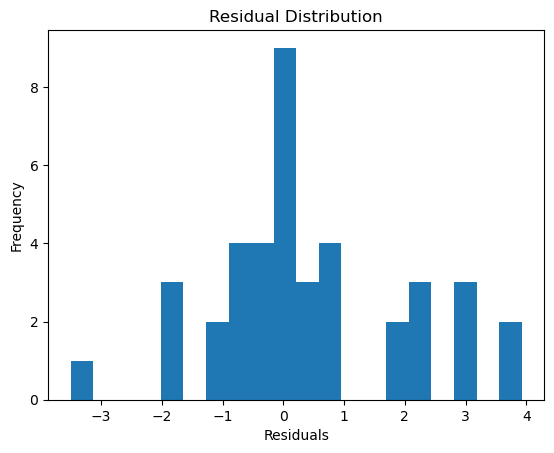

In [20]:
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()


**Positive Residuals**: When the residual is positive, it means that the model underpredicted the target variable for that data point. In other words, the actual value was higher than the predicted value.

**Negative Residuals:** Conversely, when the residual is negative, it means that the model overpredicted the target variable for that data point. The actual value was lower than the predicted value.

Th histogram showsa normal distribution of residuals implying that the errors made by the model in predicting the outcome variable (sales in this case) are randomly distributed around zero, with most errors being small and close to zero, and fewer errors being larger in magnitude, which its evident with numbers the graph.

The normal distribution of residuals suggests that the linear regression model is capturing the underlying patterns in the data well and that there are no systematic biases or trends in the model's predictions. In summary, It also suggests that the model's predictions are unbiased and reliable.

In [22]:
# quantify the overall performance of the model in terms of the residuals.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean Squared Error:", mse)
print("R Squared Value:", r2)

Mean Squared Error: 2.707163751213018
R Squared Value: 0.9026978637834334


MSE value of approximately 2.707 indicates that, the squared difference between the predicted sales and the actual sales. This suggests that the model's predictions are closer to the actual sales values, indicating better overall performance.

The high R-squared value of 0.903 indicates that the linear regression model explains a significant portion of the variance in sales using the advertising budgets as predictors. This suggests that the model is effective in capturing the relationship between advertising budgets and sales.

Overall, these metrics suggest that the linear regression model is performing well in predicting sales based on advertising budgets, with relatively low prediction errors and a strong ability to explain the variability in sales using the provided predictors.

## Model Interpretation

On this phase we'll be understanding the relationships between the TV, Radio and Newspaper and the Sales, the target variable

**Examine Coefficients:**

Analyze the coefficients of each feature on the target variable. These coefficients represent the impact on the Sales 

In [27]:
#Coefficeint
coefficients = pd.Series(model.coef_, index=X_test.columns)
print("Model Coefficients:")
print(coefficients)

Model Coefficients:
TV           0.053824
Radio        0.107698
Newspaper    0.007258
dtype: float64


Radio has the biggest impacts on Sales followed by Tv almost half the impacts and newspaper has little to no impacts on sales perfomance.

This could involve reallocating budget to more effective channels, adjusting spending levels based on historical performance, or implementing other strategies to enhance the effectiveness of the advertising campaigns.

now i need to identify the optimal combination that leads to the highest sales.

## New Campaign Prediction

In [11]:
# Example: Predict sales for a new advertising campaign with budget allocation of 200 
new_campaign_budget = [[50, 100, 25]]  # Budget allocation for radio, TV, and newspaper (2:3:1)
predicted_sales = model.predict(new_campaign_budget)
print(f'Predicted Sales: {predicted_sales[0]}')

new_campaign_budget = [[100, 25, 50]]  # Budget allocation for radio, TV, and newspaper(3;1;2)
predicted_sales = model.predict(new_campaign_budget)
print(f'Predicted Sales: {predicted_sales[0]}')

new_campaign_budget = [[25, 50, 100]]  # Budget allocation for radio, TV, and newspaper(1;2;3)
predicted_sales = model.predict(new_campaign_budget)
print(f'Predicted Sales: {predicted_sales[0]}')

#Budget allocation for only radio and TV
new_campaign_budget = [[50, 100, 0]]  
predicted_sales = model.predict(new_campaign_budget)
print(f'Predicted Sales: {predicted_sales[0]}')

new_campaign_budget = [[100, 100, 0]]  
predicted_sales = model.predict(new_campaign_budget)
print(f'Predicted Sales: {predicted_sales[0]}')

#Budget allocation for only radio 
new_campaign_budget = [[0, 200, 0]]  
predicted_sales = model.predict(new_campaign_budget)
print(f'Predicted Sales: {predicted_sales[0]}')




Predicted Sales: 18.063548677627566
Predicted Sales: 12.85888529271435
Predicted Sales: 11.877420499644792
Predicted Sales: 17.882094364998565
Predicted Sales: 20.57330520857711
Predicted Sales: 25.960654909581045


C:\Anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature nam

I have defined several combinations of budget allocations for radio, TV, and newspaper advertising channels, each representing a different strategy. For each combination of budget allocations, I used the trained linear regression model to predict sales based on the given budget distribution.
- The allocation with newwspaper: the optimal combination is where allocation ratio (2:3:1) is applied bewteen Tv, Radio and newspaper, respectively.
- The allocation with no newspaper: result in higher predicted sales where 2:2 ratio is applied on both TV and Radio channels
- The allocation with only Radio: this strategy yields the highest predicted sales.

The last combination of budget allocations is likely to be the most effective in maximizing sales, according to the model. However, i'll recommend the second budget as  optimal strategy for advertising budget allocation, to make use of both Tv and Radio channels since the historical data do shows TV has a strong positive correlation (0.901 correlation test) with sales, indicating that as spending on TV advertising increases, sales tend to increase as well.